#### Introduction 

* The health condition of individuals is impacted by a range of factors, including both unchangeable elements like ethnicity and age, and changeable factors like drinking habits and physical exercise, commonly referred to as lifestyle. A strong correlation exists between lifestyle choices and health outcomes. While certain lifestyle consequences are readily apparent, others may have more subtle repercussions. This analysis examines the relationship between several lifestyle factors and the state of one's health.
 


### Objective

* Explore and preprocessing the data set for Predictive models.

### Model in action

* Model can inform, but should not make decisions
* Especially important in healthcare

> * Patient ---> HeartDisease / No HeartDisease

### Steps:

* Problem Understanding
* Data Collection and Preparation
* * Data Pre-processing
* * Exploratory Data Analysis (EDA)
* Feature Engineering
* Data Modeling
* Model Training
* Model Evaluation

### The machine learning models used in this dataset are:

* KNN
* Decission Tree
* Support Vector Machines (SVM)
* Randomfrorest



###  What you will expect while using the system

* How accurate? ---> Accuracy

* Is the system Reliable ---> Reliability

* How secrure the system is? ---> Security

* Does the system interpret the result well? ---> Interpretibility



### Importing Necessary Libraries

* Pandas:Pandas is a Python package designed for manipulating data collections.
* It has features for reviewing, refinery, investigating, and handling data.

* Numpy: Numpy is a general-purpose array-processing package
* It also has functions for working in domain of linear algebra, fourier transform, and matrices.

* Matplotlib and seaborn: This setup is commonly used in data analysis and visualization workflows in these environments.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data Collection and Preparation




In [3]:
heart_data = pd.read_csv('https://raw.githubusercontent.com/ds-mahbub/24MLE01_Machine-Learning-Engineer/KNN/Classification/data/heart_disease.csv')
heart_data.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### **ABOUT THE DATA SET:**

* HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI). 

* BMI : Body Mass Index (BMI). 

* Smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ). 

* AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week. 

* Stroke : (Ever told) (you had) a stroke? 

* PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).

* MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days). 

* DiffWalking : Do you have serious difficulty walking or climbing stairs? 

* Sex : Are you male or female? 

* AgeCategory: Fourteen-level age category. 

* Race : Imputed race/ethnicity value. 

* Diabetic : (Ever told) (you had) diabetes? 

* PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job. 

* GenHealth : Would you say that in general your health is... 

* SleepTime : On average, how many hours of sleep do you get in a 24-hour period? 

* Asthma : (Ever told) (you had) asthma? 

* KidneyDisease : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease? 

* SkinCancer : (Ever told) (you had) skin cancer?

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### In This Data Set

* Number Of Record: 319,795
* Number Of Culumn: 18
* Nummber Of rows in each column that do not have null Values
* DataTypes: float64(4), object(14)

#### 1. Edit column names
Convert column names into lowercase letters and replace white spaces with an underscore (_). The column names are strings, so we use Python’s in-built functions str.lower() method to convert uppercase letters to lowercase and str.replace() method to replace white spaces with an underscore.

In [5]:
print("Original column names = ",heart_data.columns)

heart_data.columns= heart_data.columns.str.replace(" ","_").str.lower()
print("Column names after conversion = ",heart_data.columns)

Original column names =  Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
Column names after conversion =  Index(['heartdisease', 'bmi', 'smoking', 'alcoholdrinking', 'stroke',
       'physicalhealth', 'mentalhealth', 'diffwalking', 'sex', 'agecategory',
       'race', 'diabetic', 'physicalactivity', 'genhealth', 'sleeptime',
       'asthma', 'kidneydisease', 'skincancer'],
      dtype='object')


* str.lower() is used to convert all column names in the DataFrame to lowercase.

* This can be useful for consistency and ease of access when working with the DataFrame


#### Checking Missing Value 

* Complete case analysis (CCA), also known as list-wise deletion, is the most basic technique for handling missing data. In CCA, you simply move all the rows or records where any column or field contains a missing value.




In [6]:
heart_data.isna().sum()

heartdisease        0
bmi                 0
smoking             0
alcoholdrinking     0
stroke              0
physicalhealth      0
mentalhealth        0
diffwalking         0
sex                 0
agecategory         0
race                0
diabetic            0
physicalactivity    0
genhealth           0
sleeptime           0
asthma              0
kidneydisease       0
skincancer          0
dtype: int64

* Having no missing values is beneficial for data analysis and modeling

In [71]:
heart_data.nunique()

heartdisease           2
bmi                 3604
smoking                2
alcoholdrinking        2
stroke                 2
physicalhealth        31
mentalhealth          31
diffwalking            2
sex                    2
agecategory           13
race                   6
diabetic               4
physicalactivity       2
genhealth              5
sleeptime             24
asthma                 2
kidneydisease          2
skincancer             2
dtype: int64


#### Target Encoding

In [9]:
heart_data= heart_data[heart_data.columns].replace(
    {'Yes':1, 'No': 0, 'Male': 1, 'Female':0, 'No, borderline diabetes': 0, 'Yes (during pregnancy)':1}
)
heart_data['diabetic'] =heart_data['diabetic'].astype(int)

In [10]:
heart_data.head(5)

,heartdisease,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,sex,agecategory,race,diabetic,physicalactivity,genhealth,sleeptime,asthma,kidneydisease,skincancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0


In [11]:
heart_data["agecategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [12]:
heart_data["bmi"].unique()

array([16.6 , 20.34, 26.58, ..., 62.42, 51.46, 46.56])

### Exploratory Data Analysis (EDA)
* EDA is thus a self-propagating theory.Each data analyst adds his or her contribution,thereby contributing to the discipline.EDA, a new trend in statistics was born.EDA presents a major paradigm shift in the model-building process. EDA offers a view that is a complete reversal of the classical principles that govern the usual steps of the model-building process. EDA declares the model must always follow the data, not the other way around, as in the classical approach.

#### Univariate Analysis:Techniques like histograms, field plots, bar charts, and precis information are generally used in univariate analysis.

* Univariate analysis can include:¶
* Descriptive statistics: mean, median, mode, range, standard deviation.
* Histograms and kernel density plots to visualize the distribution.
* Box plots for visualizing quartiles and identifying outliers.
* Quantile-Quantile (Q-Q) plots to check for normality.
* add Codeadd Markdown



Q1 what is the percentage of people with hearth disease and people without Heart Disease respectively ?


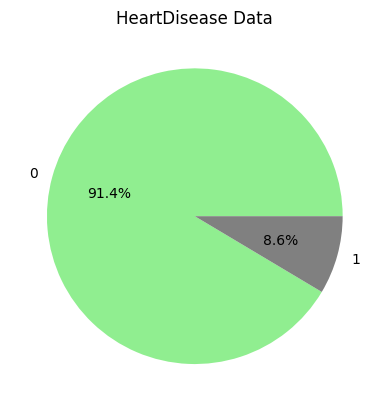

In [13]:
HeartDisease= heart_data["heartdisease"].value_counts()
plt.pie(HeartDisease.values, labels=HeartDisease.index, colors=["lightgreen", "gray"], autopct="%1.1f%%")
plt.title("HeartDisease Data")
plt.show()

* From this image we may determine that those with heart disease are (8.6%) whereas those without heart disease are(91.4%).


Q2. What AgeCategories are the highest and lowest?

In [14]:
heart_data["agecategory"] = heart_data["agecategory"].replace('80 or older', '80-84') #### Convert the 80 - older to 80-84

In [15]:
heart_data.sort_values(by='agecategory' ,inplace=True)


Text(0.5, 1.0, 'Count plot of AgeCategory')

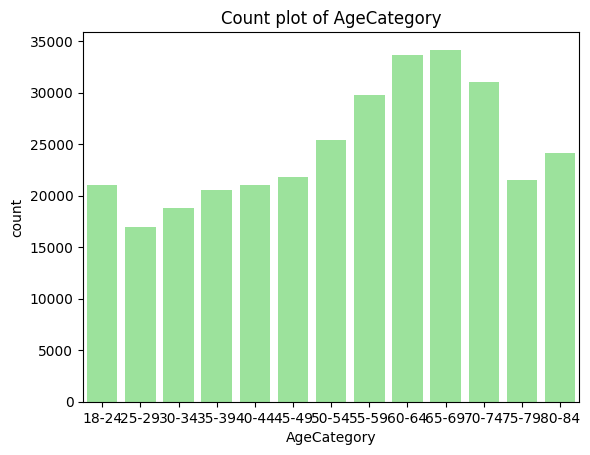

In [16]:
sns.countplot(x=heart_data["agecategory"],color='lightgreen')
plt.xlabel("AgeCategory")
plt.title("Count plot of AgeCategory")


This is the distribution of ag the age category accross many age groups. The age Category with the highest number of people are 65 - 69 group. While 25-29 are the lowest in population

### Bi-Variate Analysis
Bivariate Analysis: Analyzing the link between two variables. This can involve scatter plots, line graphs, correlation analysis, and crosstabs for categorical variables.

Q3 Which age category has the highest heart disease rate ?

In [7]:
heart_data_grouped = heart_data.groupby(['agecategory', 'heartdisease'])

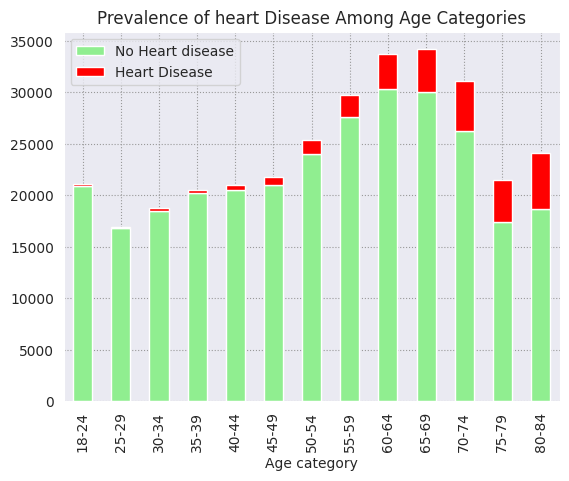

In [81]:
heart_data_grouped =  heart_data.groupby(['agecategory', 'heartdisease']).size().unstack()
heart_data_grouped .plot(kind = "bar", stacked = True, color = ["lightgreen", "red"])
plt.title("Prevalence of heart Disease Among Age Categories")
plt.xlabel("Age category")
plt.legend(["No Heart disease", "Heart Disease"],)

* The age group 80-84 has the highest heart disease rates.

Q4 What is the Smoking Rate of these patients ?

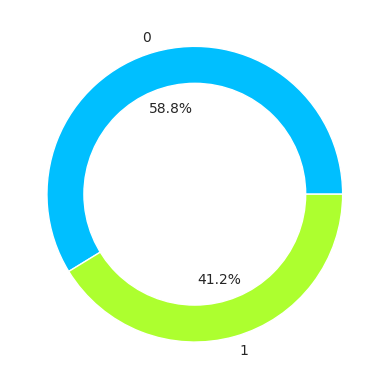

In [82]:
Smoking_rate=heart_data['smoking'].value_counts()
#create a pieplot
plt.pie(Smoking_rate.values, labels =Smoking_rate.index, colors=['deepskyblue','greenyellow'],autopct='%1.1f%%')

#add a circle at the centre to make a donut chart
my_circle=plt.Circle((0,0),0.75, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

* This visualisation shows that there are more in number patients who do no smoke (58.8%), than Patients who smoke(41.2).

Q5 How does the prevalence of smoking vary amongst the age categories ?

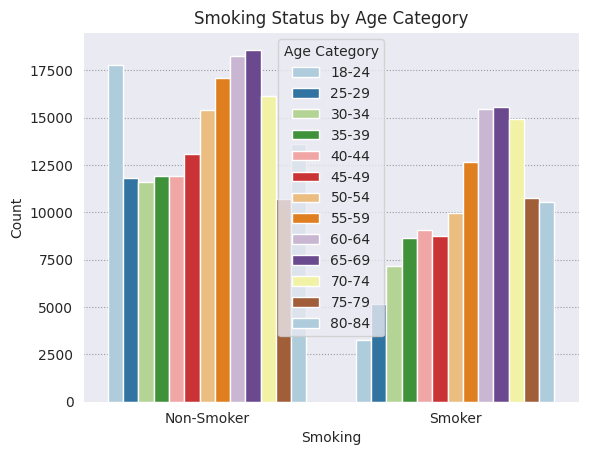

In [83]:
# Create a countplot
sns.countplot(data=heart_data, x='smoking', hue='agecategory', palette='Paired')

# Set labels and title
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Smoking Status by Age Category')

# Set original age category labels on x-axis
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])

# Show plot
plt.legend(title='Age Category')
plt.show()

* From the diagram, the age category with the highest number of smokers are the 65 - 69 age bracket, while the age bracket with the lowest amount of smokers are 18-24 age bracket..

Q6. Are individuals with stroke more likely to have a history of smoking ?

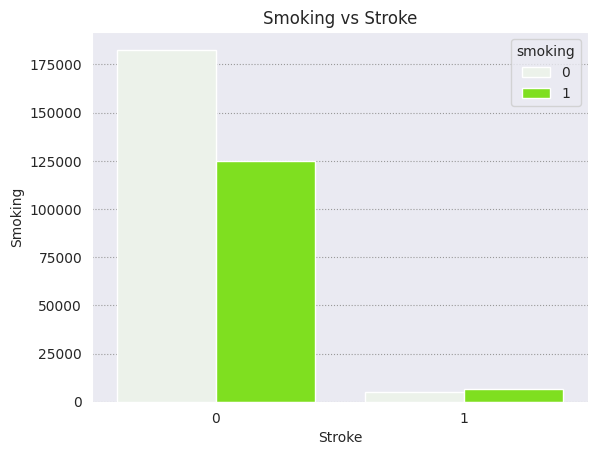

In [84]:
sns.countplot(x = "stroke", hue="smoking", color='chartreuse', data=heart_data)
plt.title("Smoking vs Stroke")
plt.xlabel("Stroke")
plt.ylabel("Smoking")
plt.show()

* Though majority of this population do not smoke, but from the population that smokes: patients who smoke have higher Stroke rate. Therefore, smoking may be a contributing factor to Stroke.



Q7. Is there any relationship between BMI and Walking Difficulty?

Text(0.5, 0, 'bmi')

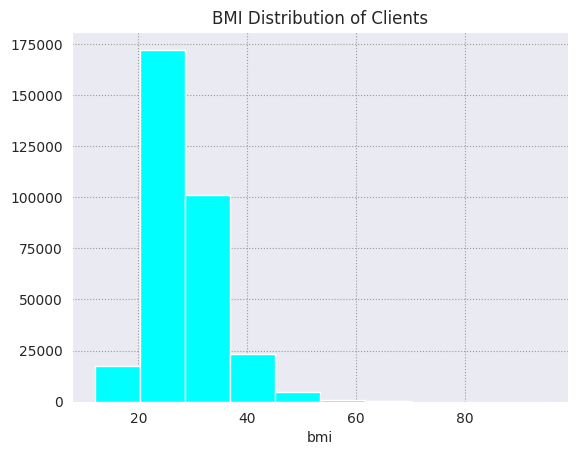

In [85]:
plt.hist(heart_data["bmi"], color= 'aqua')
plt.title("BMI Distribution of Clients")
plt.xlabel("bmi")

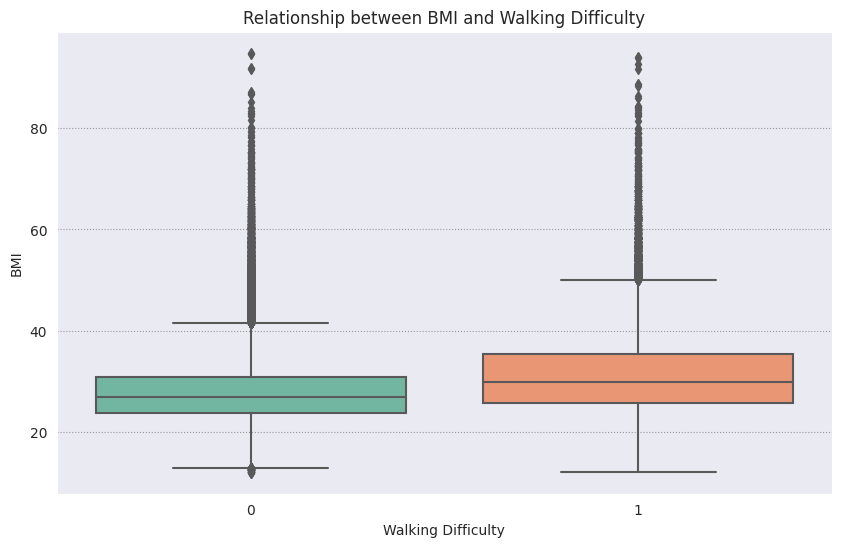

In [86]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=heart_data, x='diffwalking', y='bmi', palette='Set2')
plt.xlabel('Walking Difficulty')
plt.ylabel('BMI')
plt.title('Relationship between BMI and Walking Difficulty')
plt.show()



* Individuals who had BMI above 30 had more walking difficulty than individuals whose BMI were relatievly below 30.

### Exploring Diabetics rate

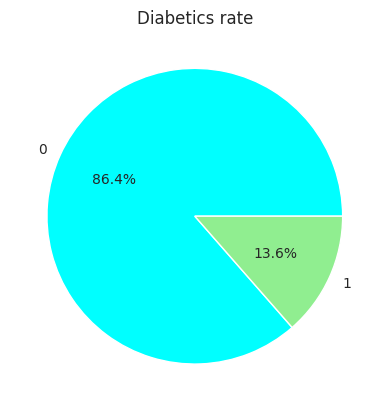

In [87]:
Diabetic = heart_data["diabetic"].value_counts()
plt.pie(Diabetic.values, labels=Diabetic.index, colors= ["aqua","lightgreen"],autopct="%1.1f%%")
plt.title("Diabetics rate")
plt.show()

* A good percentage of the population do not have diabetics (84.3%), 12.8% have diabetics, 2.1%(No) borderline diabetics and 0.8% have diabetics only during pregnancy.



#### Q8 What is the relationship between BMI and diabetics ?



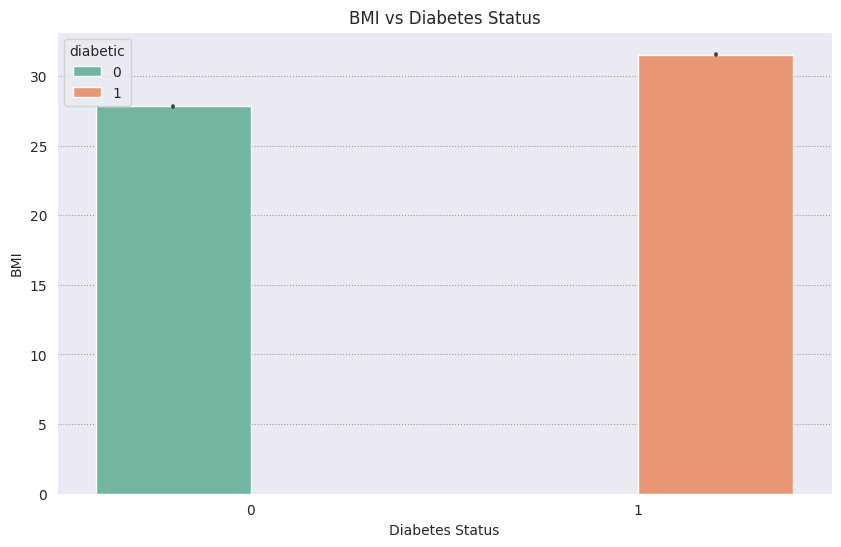

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x='diabetic', y='bmi', hue='diabetic', palette='Set2', data=heart_data)
plt.title('BMI vs Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.show()

* There is a significant positive relationship between BMI level and Diabetic state. From the figure above, the individuals with Diabetics(Yes), have their BMI above 30, but those without Diabetics(NO) have their BMI between between 25-30. This shows that people with BMI above 30 are more likely to develope diabetes than those whose bMI are below 30


Q10 Which Gender is more likely to Smoke ?



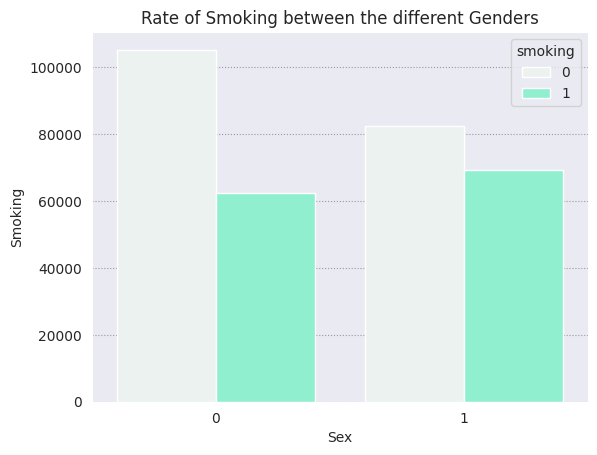

In [89]:
sns.countplot(x = "sex", hue="smoking", color='aquamarine', data=heart_data)
plt.title("Rate of Smoking between the different Genders")
plt.xlabel("Sex")
plt.ylabel("Smoking")
plt.show()

* Q12. Which Race dominates the population ?


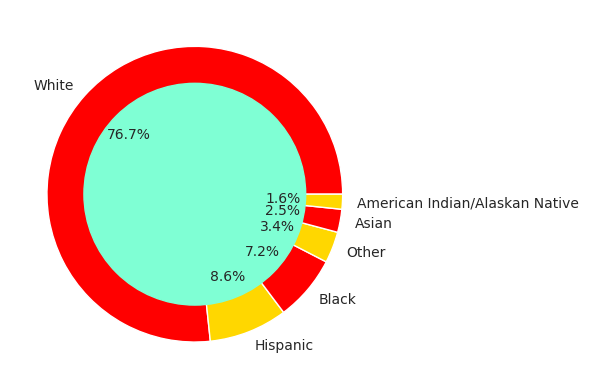

In [90]:
Smoking_rate=heart_data['race'].value_counts()
#create a pieplot
plt.pie(Smoking_rate.values, labels =Smoking_rate.index, colors=['red','gold'],autopct='%1.1f%%')

#add a circle at the centre to make a donut chart
my_circle=plt.Circle((0,0),0.75, color='aquamarine')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Q13. Which race is more suceptible to skin cancer?



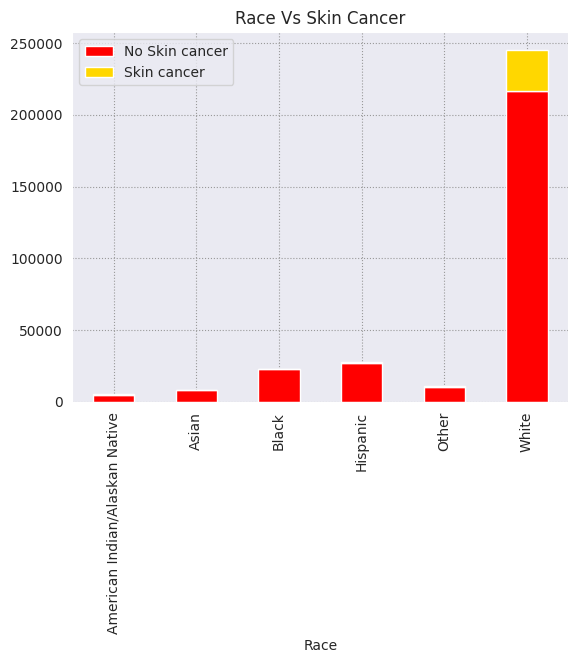

In [91]:
heart_grouped = heart_data.groupby(['race', 'skincancer']).size().unstack()
heart_grouped.plot(kind = "bar", stacked = True, color = ["red", "gold"])
plt.title("Race Vs Skin Cancer")
plt.xlabel("Race")
plt.legend(["No Skin cancer", "Skin cancer"],)

The whites are more susceptible to skin Cancer than any other race in this polpulation



Q15. What is the Correlation between Physical Activity and Sleep time ?



Text(0.5, 1.0, 'Mental Health Vs Sleep Time')

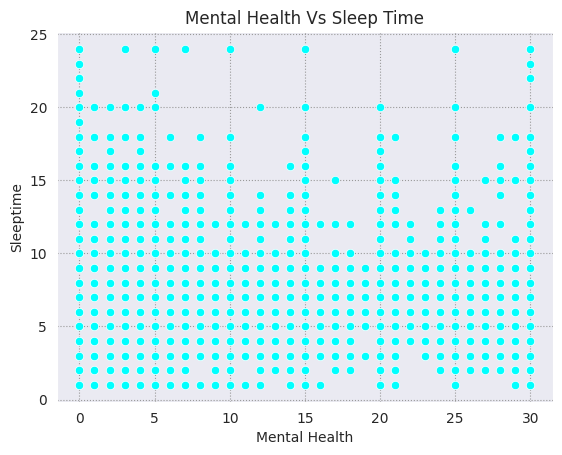

In [92]:
sns.scatterplot(heart_data, x ="mentalhealth", y= "sleeptime", color='aqua')
plt.xlabel("Mental Health")
plt.ylabel("Sleeptime")
plt.title("Mental Health Vs Sleep Time")

There is no strong correlation between mental Health State and Sleep Time because the points vary almost same accross all the data points.



Q16. Are there any associations between kidney disease and alcohol consumption ?



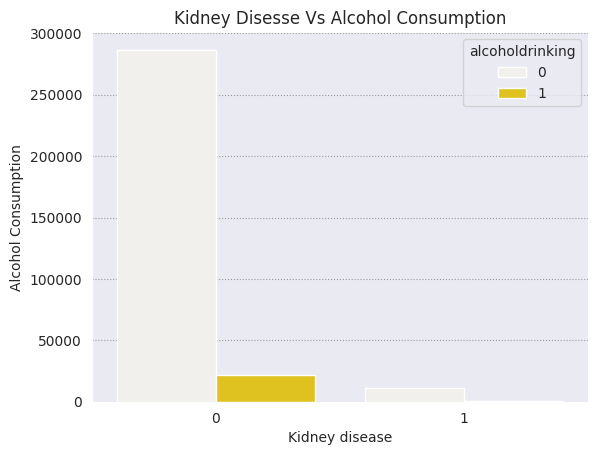

In [93]:
sns.countplot(x = "kidneydisease", hue="alcoholdrinking", color='gold', data=heart_data)
plt.title("Kidney Disesse Vs Alcohol Consumption")
plt.xlabel("Kidney disease")
plt.ylabel("Alcohol Consumption")
plt.show()

There is no significant association between alcohol consumption and Kidney disease.



### Exploration And Analysis Conducted:

* Positive Relationship with Good Health: Factors such as younger age and BMI between 20 and 30 showed a substantial positive relationship with good health. Additionally, characteristics including physical health score, sleep duration, and mental health scores exhibited a fair link with excellent health.

* Negative link with Good Health: Factors such as smoking, advanced age, and BMI above 30 revealed a substantial negative link with good health.

* Alcohol intake and Kidney Disease: There was no significant link established between alcohol intake and kidney disease.

* Gender and Heart Disease: Males were shown to be more prone to develop heart disease.

* Race and Cancer Susceptibility: White individuals were identified as more sensitive to skin cancer.

### Findings

* Individuals should endeavor to maintain a healthy BMI, especially within the range of 20 to 30, as it is significantly connected with good health.

* Avoiding smoking is vital for maintaining healthy health, as it has a very strong negative association with health outcomes.

* Males should be more attentive to their health and adopt preventive steps against heart disease.

* Individuals of white ethnicity should take special efforts to prevent exposure to toxins and lessen the chance of developing skin cancer.



## Data Preprocessing
* Hndle Duplicate Value

> While working on a real world dataset, we might come across very messy data which involves a lot of duplicate values. Such records do not add any value or information while using them in a model and would rather slow down the processing. So, it is better to remove duplicates before feeding the data to the model. The following method can be used to check for duplicate values in pandas.

* Correlation Analysis

* Removeing Outlier

*  Data Imbalanced Check 




In [17]:
### Checking Duplicates Values
heart_data.duplicated().sum()

18491

Sum is 18491, meaning there have duplicate rows in the DataFrame.

Duplicate entries can cause several issues:

Overfitting: Duplicated instances may artificially raise the relevance of specific data during model training, resulting to overfitting. This can result in a model that performs well on the training data but poorly on fresh data due to an overly complex fit to the training set.

Inflated Accuracy: Duplicate entries might inflate the accuracy of a model during evaluation. If identical instances are utilized for both training and evaluation, the model has the potential to attain a high accuracy score. Nevertheless, the precision of the model does not indicate its capacity to apply to unfamiliar data.

skewed Representation: Replicating records can alter the fundamental distribution of the data, resulting in partial estimations and skewed associations among variables. The presence of duplicated instances can have a significant impact on the training process, potentially compromising the model's capacity to effectively capture the genuine patterns present in the data.

In [18]:
heart_data.drop_duplicates(inplace = True)

In [19]:
heart_data.head(5)

,heartdisease,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,sex,agecategory,race,diabetic,physicalactivity,genhealth,sleeptime,asthma,kidneydisease,skincancer
289336,0,21.83,0,0,0,20.0,8.0,0,1,18-24,Other,0,1,Excellent,8.0,0,0,0
92977,0,21.14,0,0,0,0.0,0.0,0,0,18-24,White,0,1,Excellent,9.0,0,0,0
228704,0,20.81,0,0,0,0.0,10.0,0,0,18-24,White,0,1,Excellent,7.0,1,0,0
49749,0,20.84,1,0,0,0.0,3.0,0,1,18-24,Asian,0,0,Good,10.0,0,0,0
49753,0,24.33,0,0,0,0.0,0.0,0,1,18-24,Hispanic,0,1,Excellent,7.0,0,0,0


### Correlation Analysis

<Axes: >

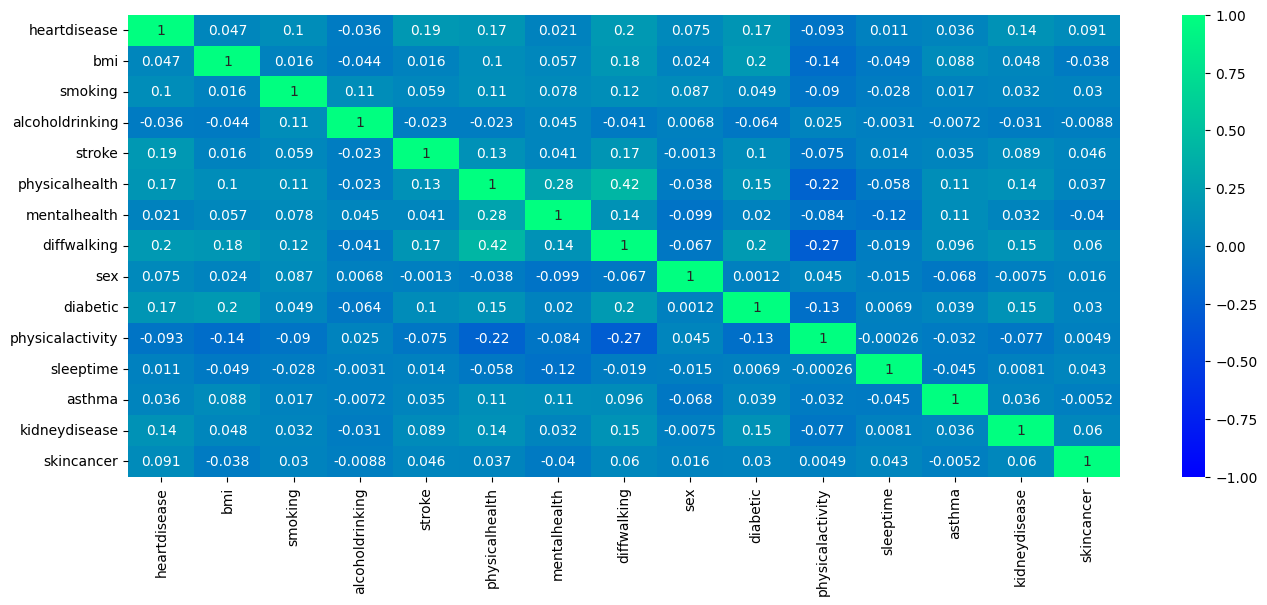

In [20]:
heart_data_cont = heart_data.select_dtypes([int,float]) # store all integer or float columns in df_cont variable
plt.figure(figsize=(16, 6)) # set the output figure size
sns.heatmap(data = heart_data_cont.corr(), vmin = -1, vmax = 1, annot = True,cmap="winter")

In [98]:
# Correlations with weekly sales
corr = heart_data.select_dtypes([int,float]).corr()['heartdisease'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="winter")

,heartdisease
heartdisease,1.000000
diffwalking,0.196343
stroke,0.194631
diabetic,0.170290
physicalhealth,0.165111
kidneydisease,0.142628
smoking,0.104485
skincancer,0.090635
sex,0.074518
bmi,0.047214


From That Map  See That 

* 'diffwalking' and 'stroke' have moderate positive correlations with 'heartdisease', meaning that as the values of 'diffwalking' and 'stroke' increase, the likelihood of 'heartdisease' also increases, although the relationship is not extremely strong.

* diabetic', 'physicalhealth', and 'kidneydisease' also have positive correlations with 'heartdisease', but the correlations are slightly weaker compared to 'diffwalking' and 'stroke'.

* 'smoking', 'skincancer', 'sex', 'bmi', and 'asthma' have weaker positive correlations with 'heartdisease'.

* 'mentalhealth', 'sleeptime', 'alcoholdrinking', and 'physicalactivity' have negative correlations with 'heartdisease', indicating that as the values of these variables increase, the likelihood of 'heartdisease' decreases, although the relationships are not very strong.




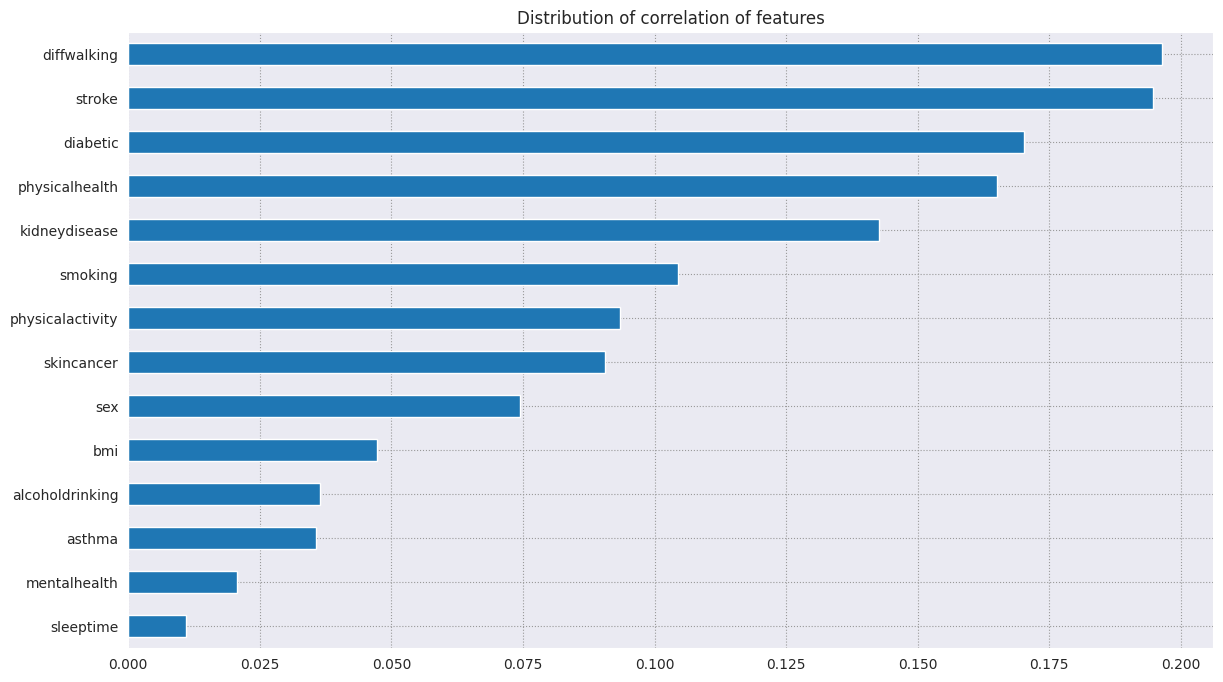

In [99]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.color_palette("magma", as_cmap=True)
plt.figure(figsize = (14, 8))
plt.title('Distribution of correlation of features')
abs(corr['heartdisease']).sort_values()[:-1].plot.barh()
plt.show()

### Detecting And Removing The Outliers

### Why is it important to check for outliers in a dataset?

* Outliers affect the machine learning model’s performance. So, it’s important to check for outliers and treat them before feeding the data into an algorithm.

In [21]:
data_new = heart_data.copy() ### taking caopy of the dataset


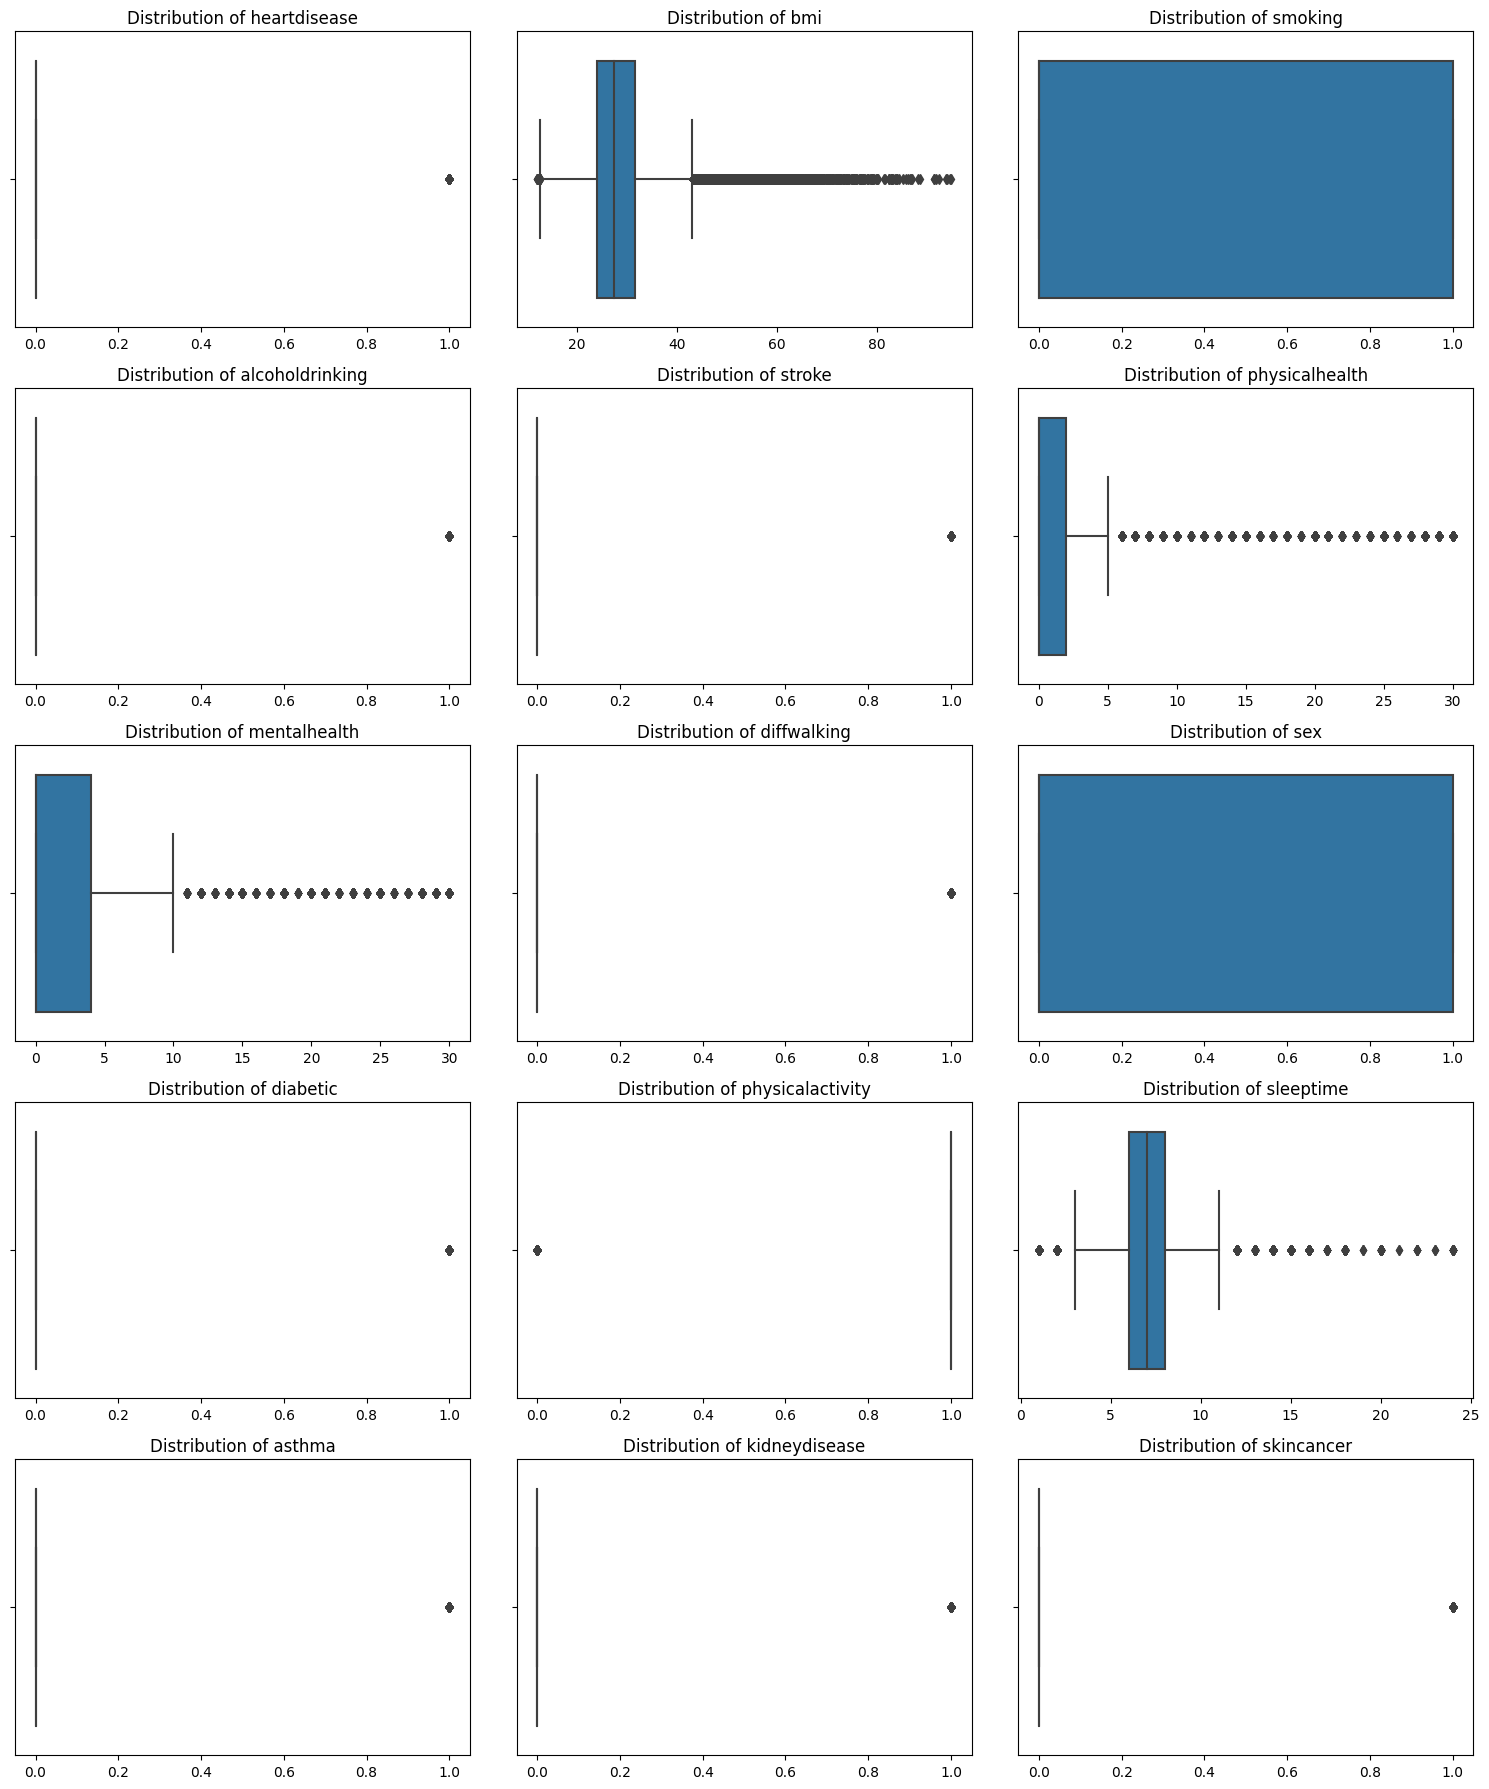

In [22]:
heart_cont = heart_data.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(15, 18)) # sets the size of the 4 plot with width as 10 and height as 10
for i, columns in enumerate(heart_cont.columns, 1): 
    ax = plt.subplot(5, 3, i) # creates 3 subplots in one single row
    sns.boxplot(data=heart_cont, x=heart_cont[columns]) # creates box plots for each feature in df_cont dataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds a title to each subplot

plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() #displays the plots

0 bmi
1 physicalhealth
2 mentalhealth
3 sleeptime


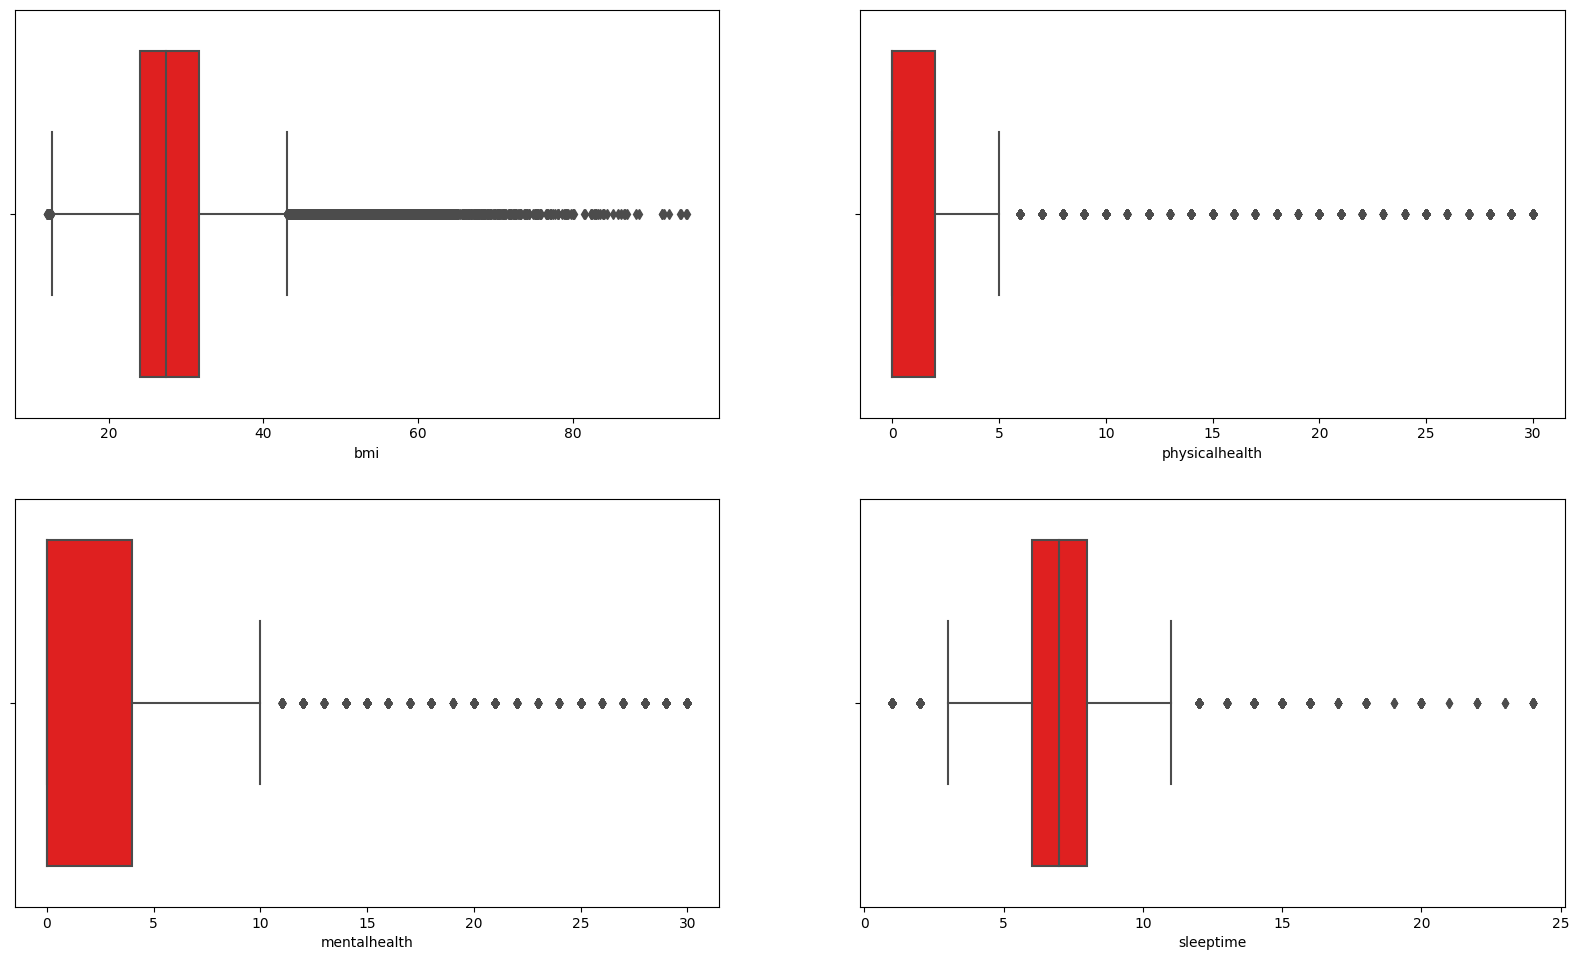

Number of data rows:  301304


In [23]:
cols = ['bmi','physicalhealth', 'mentalhealth','sleeptime']
plt.figure(figsize=(20,18))
for i,col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(data_new, x = col, color = 'red')
plt.show()

print('Number of data rows: ', data_new.shape[0])

* From The Plot See That   Time Have Outlair
* Outliers are represented as dots after the vertical lines on either side of the boxes. Except for Bmi,PhysicalHealth,Mental Health, and  Sleeptime columns, all the other columns have outliers.



### Remove Outlair 

### Z-Score Method For Bmi

* The z-score method is a statistical technique used to detect outliers by measuring how many standard deviations a data point is away from the mean. A z-score tells you how relatively far a data point is from the mean in terms of standard deviations.



### Percentile Method For Mental Health,PhysicalHealth

* The percentile method can be used to handle outliers in a dataset. The percentile method involves setting a threshold based on percentiles and capping or truncating the outlier values accordingly.

### Inter Quartile Range Method For Sleeptime

* The Interquartile Range (IQR) method is another statistical technique used to detect and handle outliers in a dataset. The IQR represents the range between the first quartile (Q1) and the third quartile (Q3) of a dataset.





In [24]:
# find the limits
upper_limit = heart_data['bmi'].mean() + 3*heart_data['bmi'].std()
lower_limit = heart_data['bmi'].mean() - 3*heart_data['bmi'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 47.85644099156194
lower limit: 9.030566150726262


* This code snippet calculates the upper limit as the mean plus three times the standard deviation (mean + 3 * std) and the lower limit as the mean minus three times the standard deviation (mean - 3 * std)

* These limits define a range beyond which data points are considered outliers based on the z-score method.

In [25]:
# Remove outliers from the unemployment column
data_new.drop(data_new[data_new['bmi'] < 17].index, axis = 0, inplace = True)
data_new.drop(data_new[data_new['bmi'] > 41].index, axis = 0, inplace = True)

> ### Parcentile Method

In [26]:
upper_limit = heart_data['physicalhealth'].quantile(0.99)
lower_limit = heart_data['physicalhealth'].quantile(0.01)
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 30.0
lower limit: 0.0


In [27]:
# Remove outliers from the unemployment column

data_new.drop(data_new[data_new['physicalhealth'] < 3 ].index, axis = 0, inplace = True)
data_new.drop(data_new[data_new['physicalhealth'] > 30.0].index, axis = 0, inplace = True)

In [29]:
data_new.drop(data_new[data_new['mentalhealth'] <-6.0 ].index, axis = 0, inplace = True)
data_new.drop(data_new[data_new['mentalhealth'] > 10.0].index, axis = 0, inplace = True)

> IQR Method


In [30]:
Q1 = heart_data['sleeptime'].quantile(0.25)
Q3 = heart_data['sleeptime'].quantile(0.75)
IQR = Q3-Q1

print(Q1)
print(Q3)
print(IQR)

6.0
8.0
2.0


In [31]:
# Define upper and lower limits based on IQR
upper_limit_iqr = Q3 + (1.5 * IQR)
lower_limit_iqr = Q1 - (1.5 * IQR)
print(upper_limit_iqr)
print(lower_limit_iqr)

11.0
3.0


In [32]:
# Remove outliers from the unemployment column
data_new.drop(data_new[data_new['sleeptime'] < 3].index, axis = 0, inplace = True)
data_new.drop(data_new[data_new['sleeptime'] > 11].index, axis = 0, inplace = True)

0 bmi
1 physicalhealth
2 mentalhealth
3 sleeptime


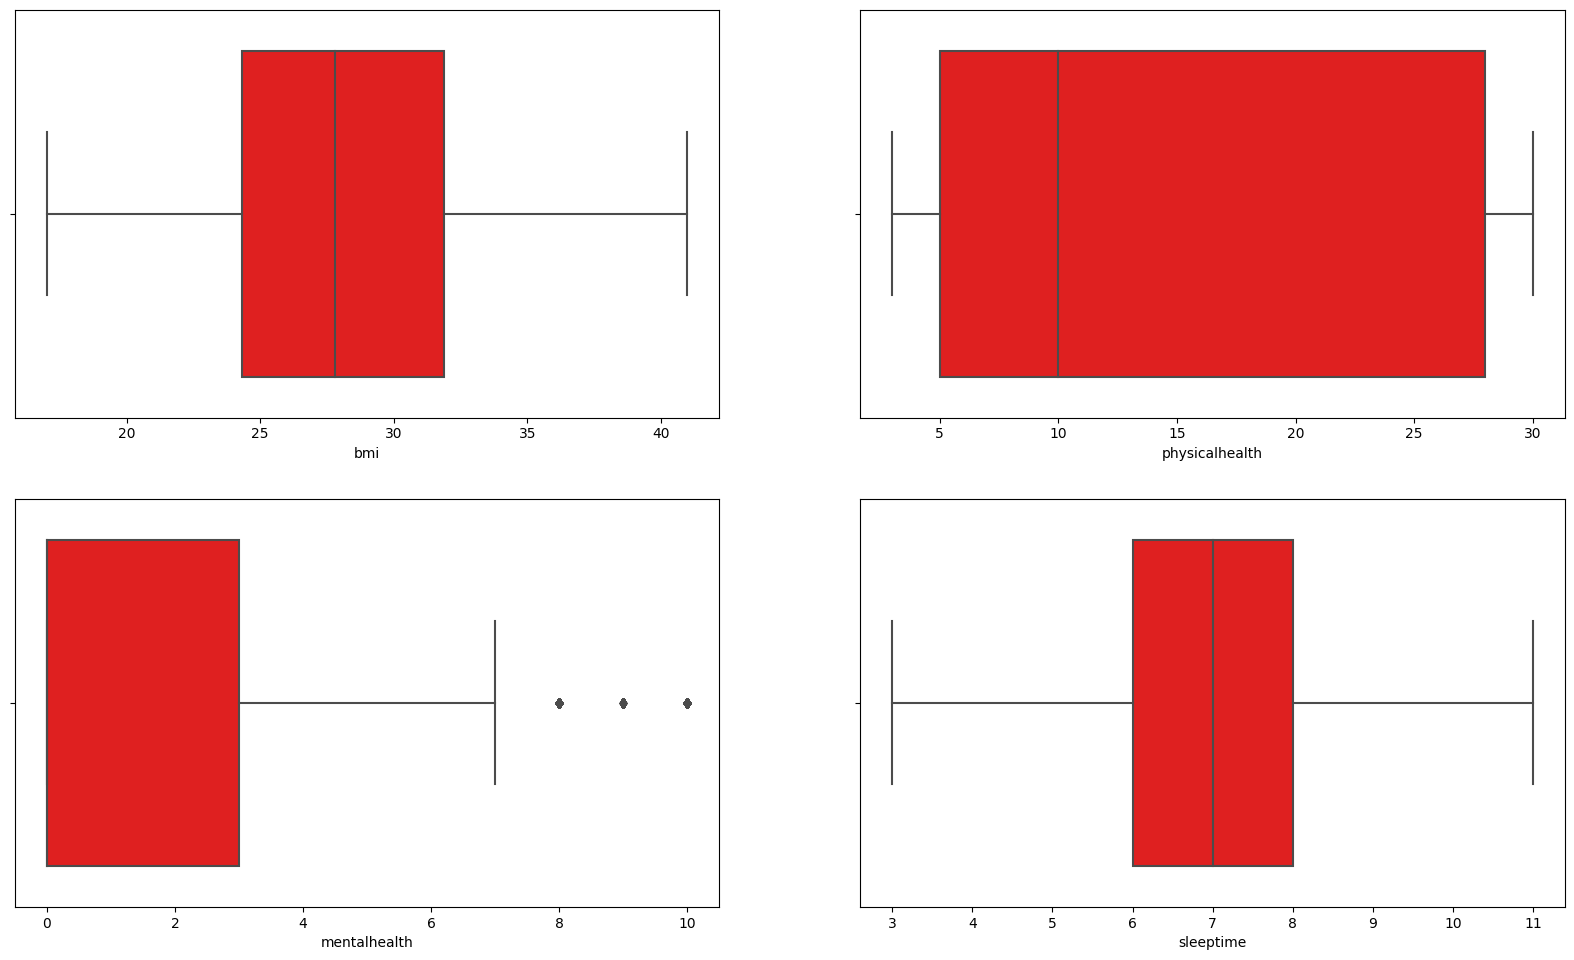

Number of data rows:  44337


In [33]:
cols = ['bmi','physicalhealth', 'mentalhealth','sleeptime']
plt.figure(figsize=(20,18))
for i,col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(data_new, x = col, color = 'red')
plt.show()

print('Number of data rows: ', data_new.shape[0])

In [112]:
data_new.head(5)

,heartdisease,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,sex,agecategory,race,diabetic,physicalactivity,genhealth,sleeptime,asthma,kidneydisease,skincancer
289336,0,21.83,0,0,0,20.0,8.0,0,1,18-24,Other,0,1,Excellent,8.0,0,0,0
179239,0,26.50,0,0,0,3.0,4.0,0,1,18-24,White,0,1,Good,6.0,0,0,0
228710,0,21.26,0,0,0,7.0,0.0,0,0,18-24,White,0,1,Very good,5.0,0,1,0
269852,0,36.36,1,0,0,4.0,0.0,0,0,18-24,White,1,1,Very good,8.0,1,0,0
92999,0,37.35,0,0,0,4.0,0.0,0,1,18-24,White,0,1,Good,8.0,0,0,0


### Data Imbalce Checked



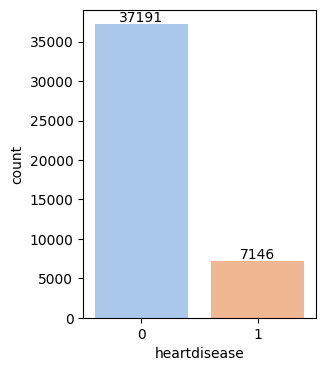

In [37]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='heartdisease',data=data_new,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

* It will be usually high and misleading 

* To fight imbalanced data is to generate new samples in the minority classes. The most naive strategy is to generate new samples by random sampling with the replacement of the currently available samples. The RandomOverSampler offers such a scheme.

### Split Dataset for Training and Testing¶


In [113]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler



# Select Features
X = data_new.drop(columns=['heartdisease'], axis=1)

# Select Target
y = data_new['heartdisease']



ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
X_ros, y_ros = ros.fit_resample(X, y)

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros,test_size=0.2, random_state=42)

# Print the Shapes of Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)


Shape of training feature: (59505, 17)
Shape of testing feature: (14877, 17)
Shape of training label: (59505,)
Shape of testing label: (14877,)


In [114]:
y_test.value_counts()

heartdisease
0    7501
1    7376
Name: count, dtype: int64

In [115]:
y_train.value_counts()

heartdisease
1    29815
0    29690
Name: count, dtype: int64

### Data Transformation
Data transformation involves modifying the data structure, format, and value to ensure that it is organized and suitable for subsequent procedures. Data transformation can effectively minimize errors in your data. Data transformation is a crucial component of the overall data processing pipeline, as it is present throughout the process from data integration to the last phases of data wrangling. Generally, we may identify the following 
categories of data transformation:

* Constructive: The process of adding, copying or replicating data.
* Destructive: deleting the records or field.
* Aesthetic: standardising the data to make it valuable.
* Structural: reorganising the data by moving, merging and renaming the columns



In [116]:
num_features = data_new.select_dtypes('number').columns.to_list()
cat_features = data_new.select_dtypes('object').columns.to_list()
print(f'Numerical Features : {num_features}')
print(f'Categorical Features: {cat_features}')

Numerical Features : ['heartdisease', 'bmi', 'smoking', 'alcoholdrinking', 'stroke', 'physicalhealth', 'mentalhealth', 'diffwalking', 'sex', 'diabetic', 'physicalactivity', 'sleeptime', 'asthma', 'kidneydisease', 'skincancer']
Categorical Features: ['agecategory', 'race', 'genhealth']


In [117]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['agecategory', 'race', 'genhealth']),
    remainder = 'passthrough'
)
# Transforming Train data
X_train_transformed = transformer.fit_transform(X_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns = transformer.get_feature_names_out())

# Concat the two tables
X_train = pd.concat([X_train_transformed_df, X_train.reset_index(drop = True)], axis = 1)

X_train.drop(['agecategory', 'race', 'genhealth'], axis = 1, inplace = True)

make_column_transformer This function is used to create a column transformer object that applies different transformations to different columns.

DataFrame X_train_transformed_df is created from the transformed array, with column names retrieved from the transformer using get_feature_names_out()



In [118]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['agecategory', 'race', 'genhealth']),
    remainder = 'passthrough'
)
# Transforming test data
X_test_transfromed = transformer.fit_transform(X_test)
X_test_transformed_data = pd.DataFrame(X_test_transfromed, columns = transformer.get_feature_names_out())

# Concat the two tables
X_test = pd.concat([X_test_transformed_data, X_test.reset_index(drop = True)], axis = 1)

X_test.drop(['agecategory', 'race', 'genhealth'], axis = 1, inplace = True)

In [119]:
y_train.value_counts()

heartdisease
1    29815
0    29690
Name: count, dtype: int64

In [120]:
y_test.value_counts()

heartdisease
0    7501
1    7376
Name: count, dtype: int64

### Standardization

In [121]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

# Scale trainint data
X_train = scaler.fit_transform(X_train)

# Scale test data
X_test = scaler.fit_transform(X_test)

#### Modeling 

In [122]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics
    
    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}
    

### Building Modeling KNN

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
# Building a model using KNeighborsClassifier 
knn_model = KNeighborsClassifier(n_neighbors = 5)

knn_model.fit(X_train,y_train)


# Evaluate Model
knn_model_eval = evaluate_model(knn_model,X_test,y_test)

# Print result
print('Accuracy:', knn_model_eval['acc'])
print('Precision:',knn_model_eval['prec'])
print('Recall:', knn_model_eval['rec'])
print('F1 Score:', knn_model_eval['f1'])
print('Cohens Kappa Score:', knn_model_eval['kappa'])
print('Area Under Curve:', knn_model_eval['auc'])

Accuracy: 0.8099751293943671
Precision: 0.7519663232524648
Recall: 0.9202819956616052
F1 Score: 0.8276534780223129
Cohens Kappa Score: 0.620630962916334
Area Under Curve: 0.8871855769917589


* The accuracy is approximately 0.81, which means that around 81% of the instances are correctly classified by the model.
 
* The precision is approximately 0.75. This means that when the model predicts a positive case, it is correct about 75% of the time.
 
* The recall is approximately 0.92. This means that the model is able to correctly identify around 92% of the actual positive cases.
 
* The F1-score is approximately 0.83. This indicates a good balance between precision and recall, where higher values are desirable.

* Cohen's Kappa score is approximately 0.62. This indicates a moderate level of agreement between the actual and predicted classifications.
 
* The AUC is approximately 0.89. This indicates that the model has good discriminatory power, with a higher AUC suggesting better performance.

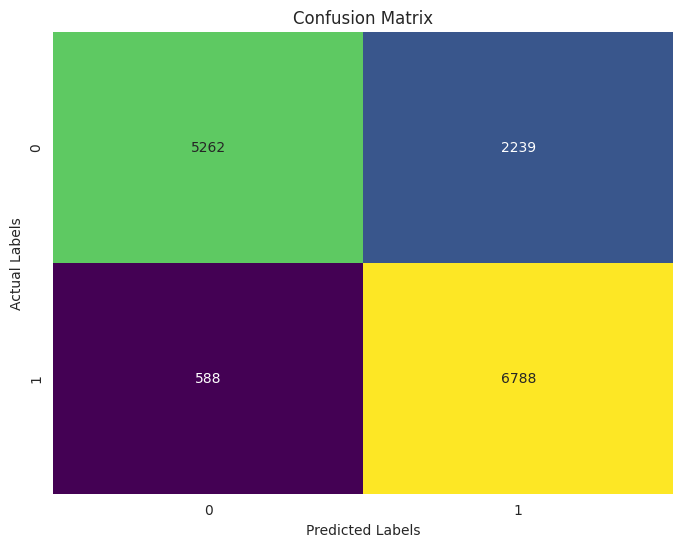

In [125]:
y_pred = knn_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot= True, fmt = 'd', cmap='viridis', cbar= False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

### Improving The KNN Performane

In [130]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
knn = KNeighborsClassifier()
param_dist = {
    'n_neighbors': randint(1, 20),  # random integers from 1 to 20
    'weights': ['uniform', 'distance'],  # try different weighting schemes
    'metric': ['euclidean', 'manhattan']  # try different distance metrics
}


random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train,y_train)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
best_score = random_search.best_score_
print("Best Cross-Validation Score:", best_score)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
Best Cross-Validation Score: 0.9031509957146457


In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
# Building a model using KNeighborsClassifier 
knn_model_imp = KNeighborsClassifier(n_neighbors = 2)

knn_model_imp.fit(X_train,y_train)


# Evaluate Model
knn_model_imp_eval = evaluate_model(knn_model_imp,X_test,y_test)

# Print result
print('Accuracy:', knn_model_imp_eval['acc'])
print('Precision:',knn_model_imp_eval['prec'])
print('Recall:', knn_model_imp_eval['rec'])
print('F1 Score:', knn_model_imp_eval['f1'])
print('Cohens Kappa Score:', knn_model_imp_eval['kappa'])
print('Area Under Curve:', knn_model_imp_eval['auc'])

Accuracy: 0.9035423808563554
Precision: 0.8667736757624398
Recall: 0.9517353579175705
F1 Score: 0.9072697899838448
Cohens Kappa Score: 0.8072285835204288
Area Under Curve: 0.9200841189359857


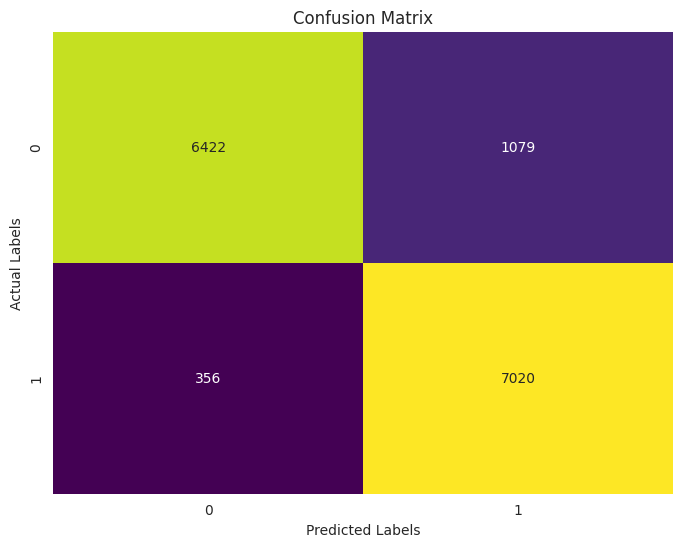

In [132]:
y_pred =knn_model_imp.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot= True, fmt = 'd', cmap='viridis', cbar= False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

### Fitting Descision Tree Without  Hyperparameters 

In [134]:
from sklearn.tree import DecisionTreeClassifier

# Building Decision Tree model 
D_tree= DecisionTreeClassifier(random_state=42)
D_tree.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(D_tree, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])# Evaluate Model

Accuracy: 0.9028029844726759
Precision: 0.8601797862001944
Recall: 0.9600054229934925
F1 Score: 0.9073552024602769
Cohens Kappa Score: 0.8057800494163364
Area Under Curve: 0.9032588044659844
Confusion Matrix:
 [[6350 1151]
 [ 295 7081]]


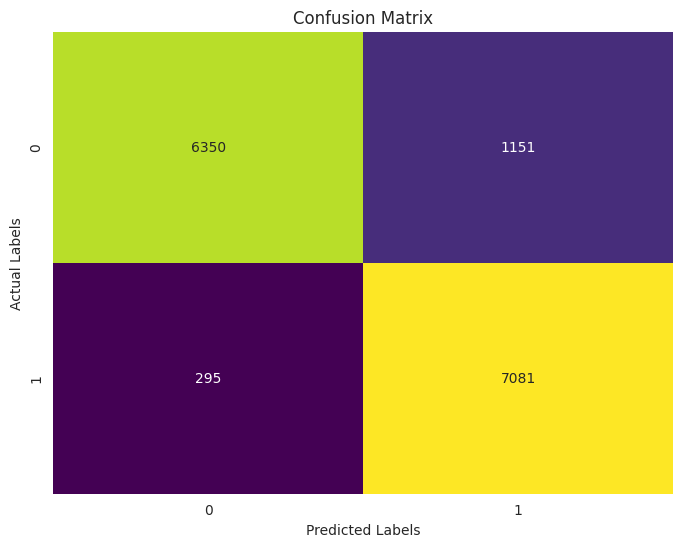

In [135]:
y_pred = D_tree.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot= True, fmt = 'd', cmap='viridis', cbar= False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

### Hyperameter Tuning 

In [137]:
# we are going to tune criterion, depth, min_samples_split, min_samples_leaf
criterion=['gini', 'entropy']
max_depth=[1,6,8,11]
min_samples_split=[1,9,11,12]
min_samples_leaf=[1,3,7,9]
param_grid={'max_depth':max_depth,
            'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'criterion':criterion}

In [138]:
param=dict(criterion='criterion',max_depth='max_depth', min_samples_split='min_samples_split',min_samples_leaf='min_samples_leaf')

In [139]:
from sklearn.model_selection import GridSearchCV
#cv=3 i.e 3 cross folds, verbose=200 i.e the more the verbose the more info we get
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,n_jobs=-1,cv=3,verbose=0)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 8, 11],
                         'min_samples_leaf': [1, 3, 7, 9],
                         'min_samples_split': [1, 9, 11, 12]})

In [140]:
#best parameters that achieves higher score
grid.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 9}

In [141]:
grid.best_score_

0.7380556255776826

In [142]:
dt_tuned_model=DecisionTreeClassifier(criterion= 'gini',
 max_depth=11,
 min_samples_leaf= 1,
 min_samples_split= 9)
dt_tuned_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11, min_samples_split=9)

In [143]:
# Evaluate Model
dtree_eval = evaluate_model(dt_tuned_model, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])

Accuracy: 0.9028029844726759
Precision: 0.8601797862001944
Recall: 0.9600054229934925
F1 Score: 0.9073552024602769
Cohens Kappa Score: 0.8057800494163364
Area Under Curve: 0.9032588044659844
Confusion Matrix:
 [[6350 1151]
 [ 295 7081]]


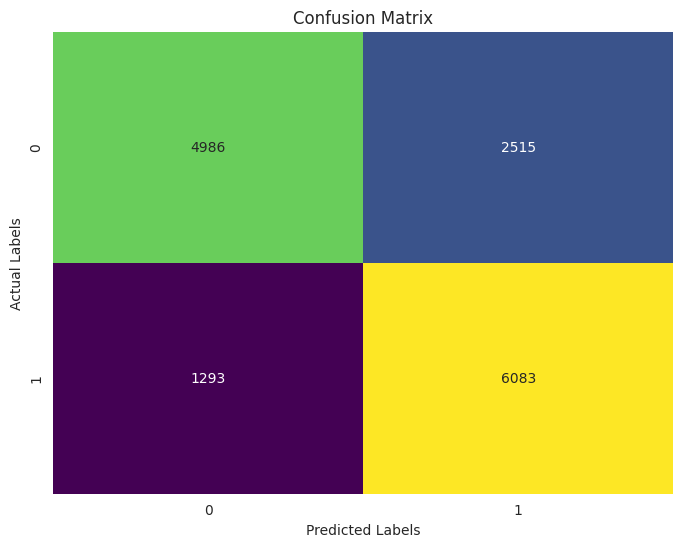

In [144]:
y_pred = dt_tuned_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot= True, fmt = 'd', cmap='viridis', cbar= False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

### Model Comparision Without HyperPerameter Tuning

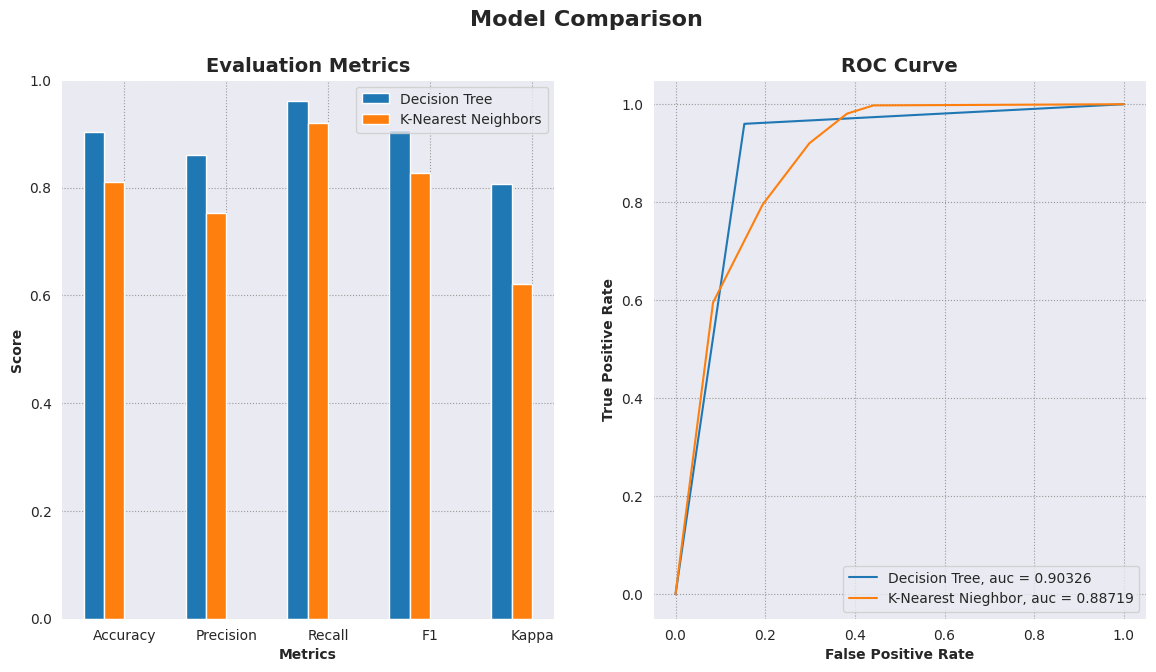

In [146]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtree_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_model_eval['acc'], knn_model_eval['prec'], knn_model_eval['rec'], knn_model_eval['f1'], knn_model_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtree_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, dtree_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtree_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_model_eval['fpr'], knn_model_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_model_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

### Model Comparision With Hyper Perameter Tuning

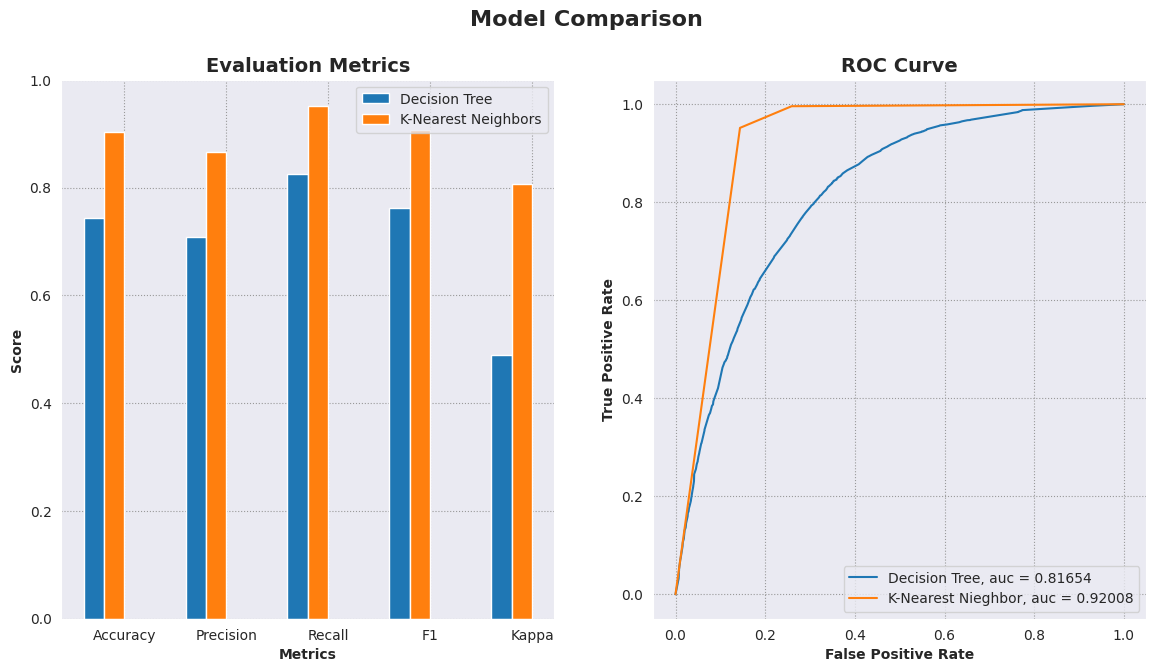

In [147]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtree_score = [dtree_eval['acc'], dtree_eval['prec'],dtree_eval['rec'],dtree_eval['f1'],dtree_eval['kappa']]
knn_score = [knn_model_imp_eval['acc'],knn_model_imp_eval['prec'],knn_model_imp_eval['rec'],knn_model_imp_eval['f1'],knn_model_imp_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtree_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, dtree_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtree_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtree_eval['fpr'], dtree_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtree_eval['auc']))
ax2.plot(knn_model_imp_eval['fpr'],knn_model_imp_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_model_imp_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

### Conclution



* KNN Performancee Best After Tuned Hyperperameter

* Decision Tree Perform Without Tuned Hyperperameter